# This Notebook tries to Predict number of Stickers Sold.

### Loading Dataset.

Let's start by loading the data for exploration.

In [3]:
# Necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path = "../../../Data/playground-series-s5e1/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

A quick peek at the data.

In [9]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [70]:
train.tail()

,date,country,store,product,num_sold
id,,,,,
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [11]:
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [72]:
test.tail()

,date,country,store,product
id,,,,
328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler
328679,2019-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode


In [15]:
# Let's make the id column the index of the dataframes. 
train = train.set_index("id")
test = test.set_index("id")

### Exploratory Data Analysis.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.5+ MB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98550 entries, 230130 to 328679
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     98550 non-null  object
 1   country  98550 non-null  object
 2   store    98550 non-null  object
 3   product  98550 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [102]:
# Number of stickers sale missing.
null_num_sold = train.loc[train["num_sold"].isnull() == True, ["num_sold"]]
null_num_sold_count = len(null_num_sold)
percent_missing = np.round((null_num_sold_count/len(train))*100, 2)
print(f"{null_num_sold_count} stickers have missing values out of {len(train)} total sticketrs representing {percent_missing}%")

8871 stickers have missing values out of 230130 total sticketrs representing 3.85%


In [64]:
# Countries in train.
train["country"].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [66]:
# Stores selling stickers.
train["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [92]:
 # Products sold.
train["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

### Visualization.

We will make a barplot, histogram and line for various aspects of the dataset.

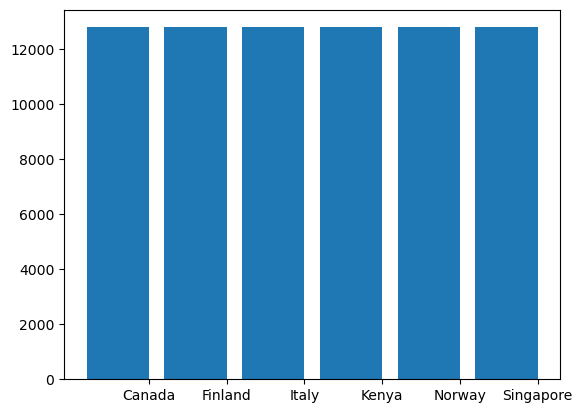

In [242]:
# Barplot for the different stores in each country.
stores_country = train.groupby(["country", "store"])[["store"]].count()
stores_country = stores_country.rename(columns = {"store": "store_count"})
stores_country = stores_country.reset_index()
fig, ax = plt.subplots()
ax.bar(x="country", height="store_count", data=stores_country)
plt.show()

In [260]:
pd.melt(stores_country)

,variable,value
0,country,Canada
1,country,Canada
2,country,Canada
3,country,Finland
4,country,Finland
5,country,Finland
6,country,Italy
7,country,Italy
8,country,Italy
9,country,Kenya


### Experimentation

Before loop. x: [0 1 2], width: 0.25, multiplier: 0
In loop. offset: 0.0, multiplier: 1, new_location: [0. 1. 2.]
In loop. offset: 0.25, multiplier: 2, new_location: [0.25 1.25 2.25]
In loop. offset: 0.5, multiplier: 3, new_location: [0.5 1.5 2.5]


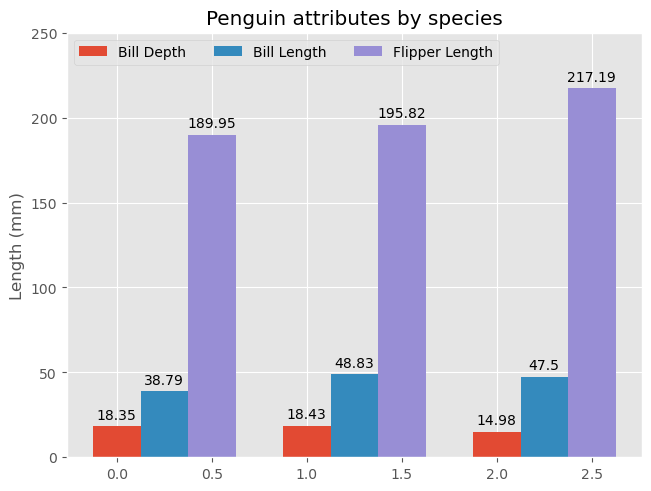

In [258]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
print(f"Before loop. x: {x}, width: {width}, multiplier: {multiplier}")

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    new_location = x+offset
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()
